<a href="https://colab.research.google.com/github/johnjoshua1508/sales-prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SALES PREDICTION USING PYTHON

Sales prediction is essential for businesses to optimize advertising strategies and maximize revenue. In this notebook, we'll use machine learning to forecast sales based on advertising expenditure across different mediums: TV, Radio, and Newspaper. We'll explore the dataset, train various models, and determine the most influential advertising medium for sales prediction.

In [27]:
# Step 1: Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Step 2: Load the dataset
data = pd.read_csv("advertising.csv")

# Display the first few rows of the dataset
print(data.head())

# Check for missing values and data types
print(data.info())

# Statistical summary
print(data.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

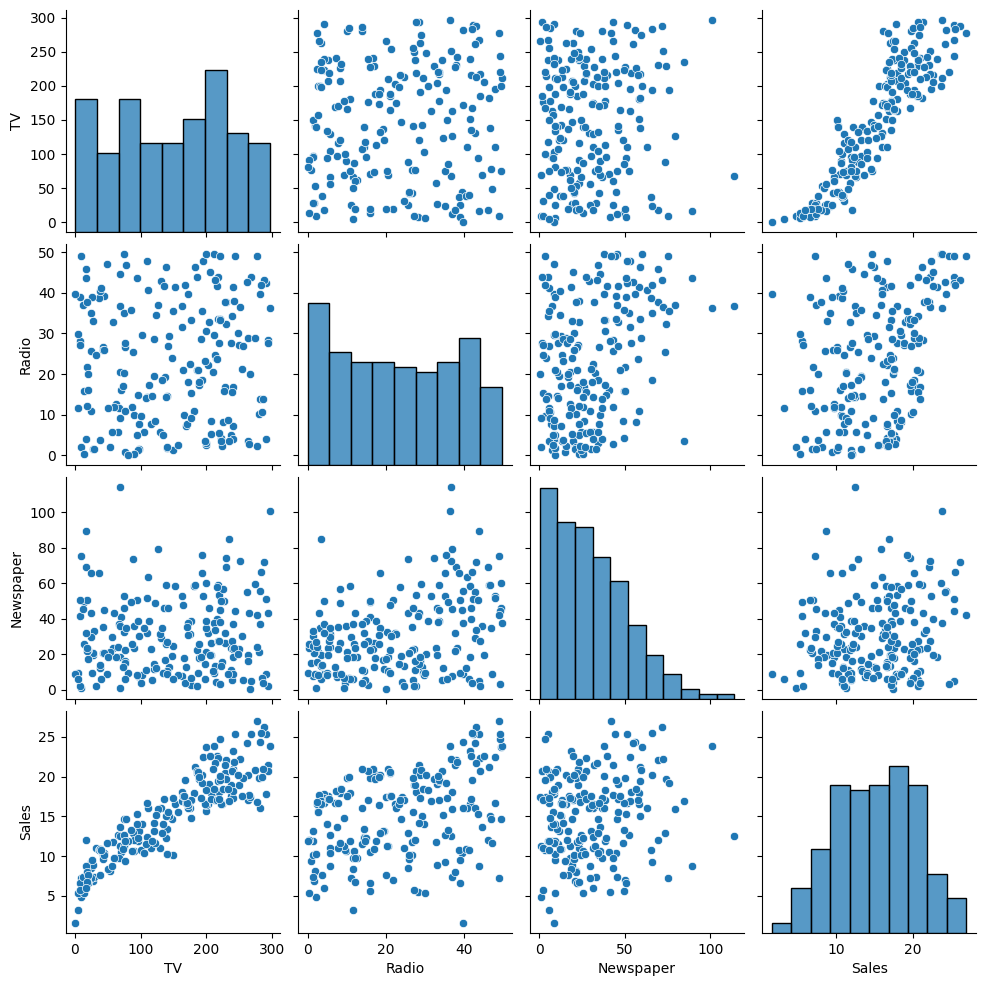

In [29]:
# Step 3: Exploratory Data Analysis (EDA)

# Pairplot to visualize the relationship between variables
sns.pairplot(data)
plt.show()


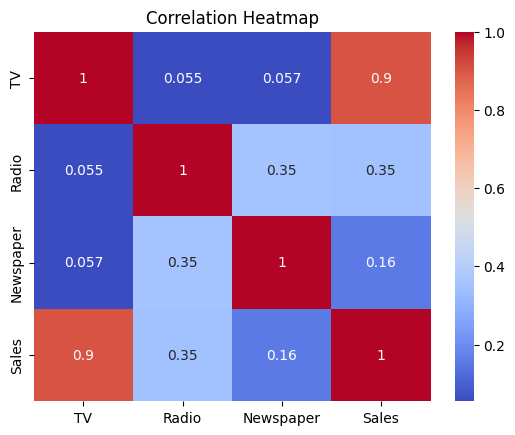

In [30]:
# Correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

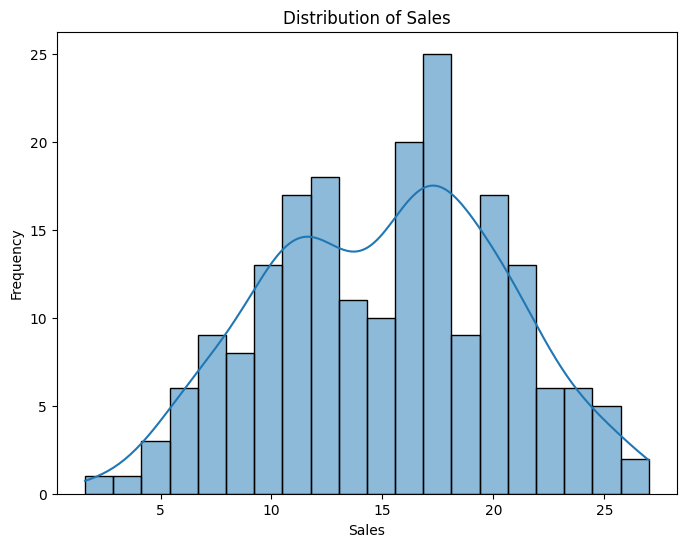

In [31]:
# Distribution of Sales
plt.figure(figsize=(8, 6))
sns.histplot(data['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

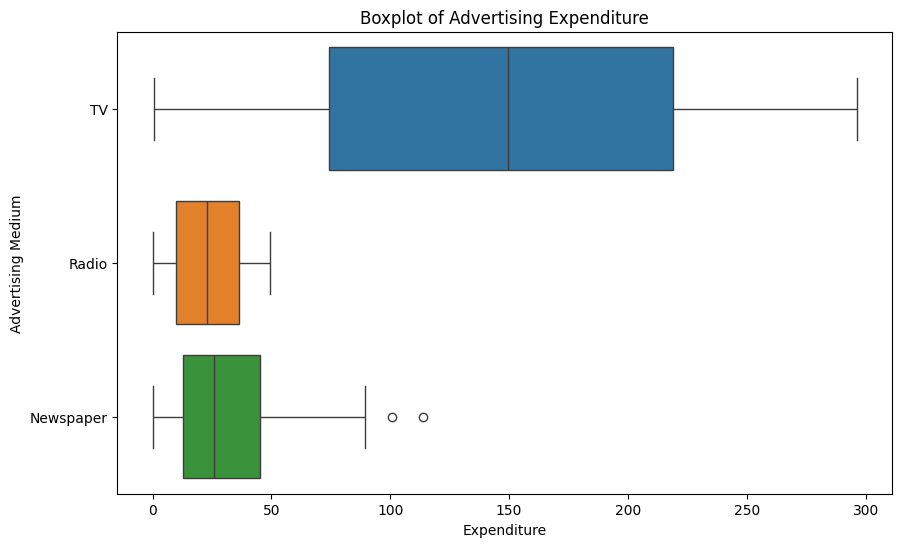

In [32]:
# Boxplot of Sales by each advertising medium
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop('Sales', axis=1), orient='h')
plt.title('Boxplot of Advertising Expenditure')
plt.xlabel('Expenditure')
plt.ylabel('Advertising Medium')
plt.show()

In [33]:
# Step 4: Feature Engineering

# Define features (X) and target variable (y)
X = data.drop("Sales", axis=1)
y = data["Sales"]


The Random Forest Regressor model outperforms the other two models in terms of both mean squared error and R-squared. It has the lowest MSE and the highest R-squared, indicating better predictive performance.

In [34]:
# Step 5: Model Selection and Training

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("--------------------------")

Model: Linear Regression
Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826
--------------------------
Model: Random Forest Regressor
Mean Squared Error: 1.4374328500000009
R-squared: 0.9534827934927883
--------------------------
Model: Support Vector Regressor
Mean Squared Error: 3.499087197255254
R-squared: 0.886764963148391
--------------------------


In [35]:

# Step 6: Prediction for new data
# Predict sales for new data
new_data = pd.DataFrame({"TV": [100], "Radio": [25], "Newspaper": [10]})

for name, model in models.items():
    predicted_sales = model.predict(new_data)
    print(f"Predicted Sales for new data using {name}: {predicted_sales}")


Predicted Sales for new data using Linear Regression: [12.73205401]
Predicted Sales for new data using Random Forest Regressor: [13.083]
Predicted Sales for new data using Support Vector Regressor: [12.99668775]


The Random Forest Regressor predicts the highest sales for the new data, followed closely by the Support Vector Regressor, while the Linear Regression predicts the lowest sales.

In summary, based on the evaluation metrics and the prediction results for new data, the Random Forest Regressor appears to be the best-performing model for sales prediction in this scenario.

Random Forest Feature Importances:
TV           0.845355
Radio        0.136642
Newspaper    0.018003
dtype: float64


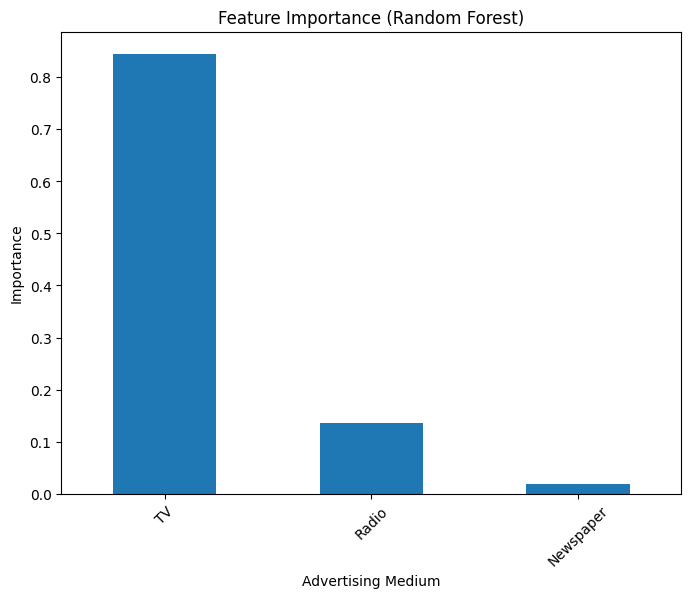

In [36]:
# Access feature importances of Random Forest Regressor model
feature_importances_rf = models["Random Forest Regressor"].feature_importances_
feature_importance_rf = pd.Series(feature_importances_rf, index=X.columns)
print("Random Forest Feature Importances:")
print(feature_importance_rf)
# Plot feature importance
plt.figure(figsize=(8, 6))
feature_importance_rf.plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Advertising Medium')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


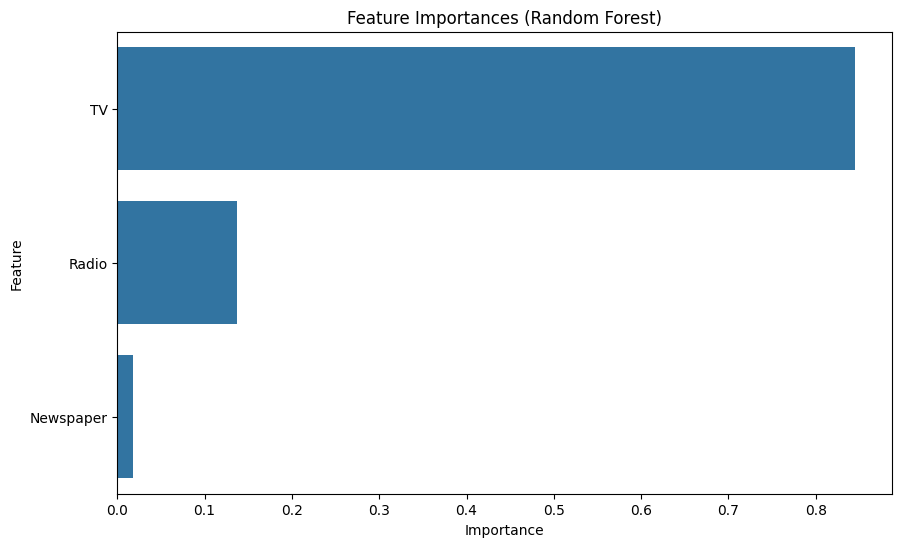

In [37]:
# Extract feature importances from the Random Forest model
feature_importances = models["Random Forest Regressor"].feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


This suggests that TV advertising has the greatest impact on sales, followed by radio advertising, while newspaper advertising has relatively little impact. Therefore, in this analysis, TV advertising appears to be the most effective medium for driving sales.